In [1]:
# define lib's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/lab-420/ml/main/LinearRegression/hp_data.csv")
df

,Unnamed: 0,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
...,...,...,...,...,...,...,...,...,...,...
3495,636,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3496,1664,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
3497,1252,7350000,Yelachenahalli,Super built-up Area,1330,Resale,10,1,4,1
3498,903,4800000,Abbaiah Reddy Layout,Built-up Area,1200,Resale,10,1,4,1


In [3]:
df.head()

,Unnamed: 0,price,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,1341,6300000,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,2126,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,816,3800000,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,2708,10500000,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,1041,11500000,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [4]:
df.shape

(3500, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3500 non-null   int64 
 1   price       3500 non-null   int64 
 2   place       3500 non-null   object
 3   built       3500 non-null   object
 4   sqft        3500 non-null   int64 
 5   sale        3500 non-null   object
 6   yearsOld    3500 non-null   int64 
 7   floor       3500 non-null   int64 
 8   totalFloor  3500 non-null   int64 
 9   bhk         3500 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 273.6+ KB


In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,price,sqft,yearsOld,floor,totalFloor,bhk
Unnamed: 0,1.000000,0.030283,0.001018,-0.022503,0.005641,0.008018,0.005641
price,0.030283,1.000000,0.778364,0.215712,0.263472,0.402256,0.263472
sqft,0.001018,0.778364,1.000000,0.229461,0.356053,0.358946,0.356053
yearsOld,-0.022503,0.215712,0.229461,1.000000,-0.116427,-0.142562,-0.116427
floor,0.005641,0.263472,0.356053,-0.116427,1.000000,0.958100,1.000000
totalFloor,0.008018,0.402256,0.358946,-0.142562,0.958100,1.000000,0.958100
bhk,0.005641,0.263472,0.356053,-0.116427,1.000000,0.958100,1.000000


In [7]:
df.corrwith(df.price)

<ipython-input-7-d1329e8f9b2b>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.price)


Unnamed: 0    0.030283
price         1.000000
sqft          0.778364
yearsOld      0.215712
floor         0.263472
totalFloor    0.402256
bhk           0.263472
dtype: float64

<ipython-input-8-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

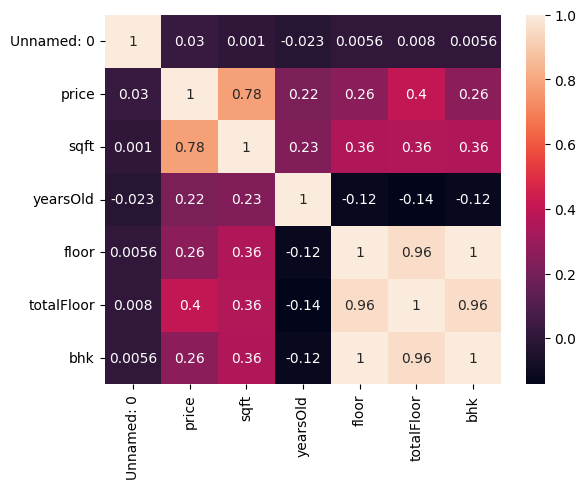

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
#data to i/p and o/p
X = df.loc[:,['sqft','totalFloor','bhk']]
y = df[['price']]

In [10]:
#split the data to train and test model
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

In [12]:
X_train.shape

(3325, 3)

In [13]:
X_train

,sqft,totalFloor,bhk
1188,1019,5,2
2423,1330,4,1
3482,2190,5,3
2130,1100,4,3
679,1330,4,1
...,...,...,...
720,1200,4,1
92,2190,5,3
1844,2190,5,3
1133,1784,18,18


In [14]:
y_train.shape

(3325, 1)

In [15]:
y_train

,price
1188,3800000
2423,7350000
3482,11500000
2130,4900000
679,7350000
...,...
720,4800000
92,11500000
1844,11500000
1133,7900000


In [16]:
X_test.shape

(175, 3)

In [17]:
X_test

,sqft,totalFloor,bhk
2954,1019,5,2
2846,1784,18,18
141,1100,4,3
1823,1200,4,1
1149,1100,4,3
...,...,...,...
2919,2190,5,3
1095,1200,4,1
3117,1100,4,3
1550,1672,10,6


In [18]:
y_test.shape

(175, 1)

In [19]:
y_test

,price
2954,3800000
2846,7900000
141,4900000
1823,4800000
1149,4900000
...,...
2919,11500000
1095,4800000
3117,4900000
1550,15000000


In [20]:
# define model
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()
model

LinearRegression()

In [22]:
model.fit(X_train,y_train)
model

LinearRegression()

In [23]:
predict=model.predict(X_test)
predict

array([[ 4509182.30728334],
       [ 8888008.70932418],
       [ 1709396.0394446 ],
       [ 5943228.82929235],
       [ 1709396.0394446 ],
       [ 8705920.2609509 ],
       [ 8888008.70932418],
       [ 7111644.81719959],
       [ 5690998.21362081],
       [ 7111644.81719959],
       [29402534.3474167 ],
       [ 8190182.65219089],
       [13009491.55188611],
       [ 4509182.30728334],
       [ 5690998.21362081],
       [ 5690998.21362081],
       [13009491.55188611],
       [13009491.55188611],
       [ 4509182.30728334],
       [ 7111644.81719959],
       [ 7111644.81719959],
       [ 5943228.82929235],
       [ 7111644.81719959],
       [ 5690998.21362081],
       [ 5943228.82929235],
       [ 8190182.65219089],
       [ 4509182.30728334],
       [13009491.55188611],
       [ 8705920.2609509 ],
       [ 1709396.0394446 ],
       [ 5690998.21362081],
       [17820136.75413426],
       [ 4509182.30728334],
       [ 5943228.82929235],
       [ 7111644.81719959],
       [ 5943228.829

In [24]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [25]:
r2_score(y_test,predict)

0.8097552366621703

In [26]:
predict,y_test

(array([[ 4509182.30728334],
        [ 8888008.70932418],
        [ 1709396.0394446 ],
        [ 5943228.82929235],
        [ 1709396.0394446 ],
        [ 8705920.2609509 ],
        [ 8888008.70932418],
        [ 7111644.81719959],
        [ 5690998.21362081],
        [ 7111644.81719959],
        [29402534.3474167 ],
        [ 8190182.65219089],
        [13009491.55188611],
        [ 4509182.30728334],
        [ 5690998.21362081],
        [ 5690998.21362081],
        [13009491.55188611],
        [13009491.55188611],
        [ 4509182.30728334],
        [ 7111644.81719959],
        [ 7111644.81719959],
        [ 5943228.82929235],
        [ 7111644.81719959],
        [ 5690998.21362081],
        [ 5943228.82929235],
        [ 8190182.65219089],
        [ 4509182.30728334],
        [13009491.55188611],
        [ 8705920.2609509 ],
        [ 1709396.0394446 ],
        [ 5690998.21362081],
        [17820136.75413426],
        [ 4509182.30728334],
        [ 5943228.82929235],
        [ 7111

In [27]:
model.predict([[1000,5,2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4338413.81674305]])

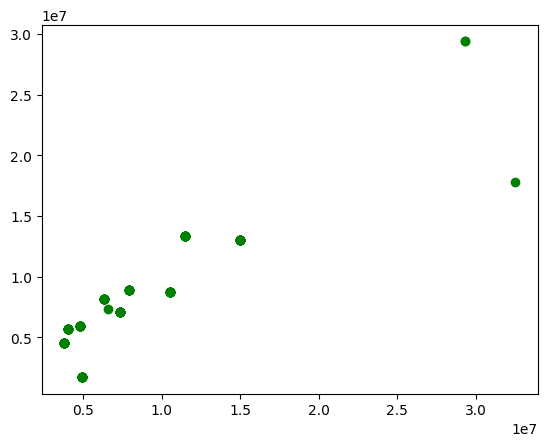

In [28]:
#plt.scatter(X_test,y_test,color='red')
plt.scatter(y_test,predict,color="green")

In [29]:
mean_absolute_error(y_test,predict)

1610561.1470471723

In [30]:
mean_squared_error(y_test,predict)


4236429847319.1543